In [1]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
file_path = r'E:\Codsoft\Genre Classification Dataset\train_data.txt'
#DEFINE COLUMN NAMES FOR THE DATASETS
columns = [ 'Movie Name' , 'Genre' , 'Description']
# Load the file into a DataFrame
mydata_train= pd.read_csv(file_path, delimiter=':::',engine='python',names=columns)
mydata_train.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
mydata_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie Name   54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
mydata_train.describe()

,Movie Name,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
file_path = r'E:\Codsoft\Genre Classification Dataset\test_data.txt'
#DEFINE COLUMN NAMES FOR THE DATASETS
columns = [ 'Movie Name' , 'Genre' , 'Description']
# Load the file into a DataFrame
#DEFINE COLUMN NAMES FOR THE DATASETS
mydata_test= pd.read_csv(file_path, delimiter=':::',engine='python',names=columns)
mydata_test.head()

,Movie Name,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
mydata_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie Name   54200 non-null  int64 
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
mydata_test.describe()

,Movie Name
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


### Data Cleaning

In [9]:
# CHECK FOR DUPLICATE ROWS IN THE TRAINING DATASET
print("TRAINING DUPLICATES:", mydata_train.duplicated().sum())

TRAINING DUPLICATES: 0


In [10]:
print("TRAINING DUPLICATES:", mydata_test.duplicated().sum())

TRAINING DUPLICATES: 0


### Data Visualization

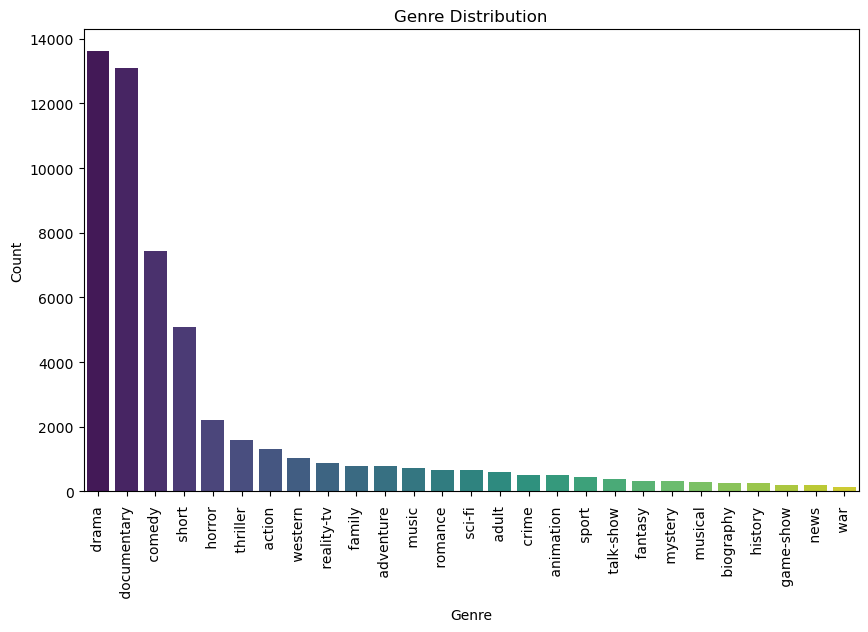

In [12]:
# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=mydata_train , order=mydata_train['Genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

 #### SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS

In [14]:
# SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS
x_train_data = mydata_train['Description']
y_train_data = mydata_train['Genre']

x_test_data = mydata_test['Description']
y_test_data = mydata_test['Genre']

print(x_train_data.shape)
print(y_train_data.shape)

(54214,)
(54214,)


### Data Splitting

In [16]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from sklearn.model_selection import train_test_split

# SPLIT THE TRAINING DATA INTO TRAINING AND VALIDATION SETS
X_train , X_val , Y_train , Y_val = train_test_split(x_train_data , y_train_data , test_size=0.2 , random_state=42)

####  DISPLAY THE SHAPES OF THE FEATURE AND LABEL ARRAYS FOR THE TEST DATASET


In [18]:
print(x_test_data.shape)
print(y_test_data.shape)

(54200,)
(54200,)


#### DISPLAY THE SHAPES OF THE FEATURE AND LABEL ARRAYS FOR THE TRAINING DATASET


In [20]:
print(x_train_data.shape)
print(y_train_data.shape)

(54214,)
(54214,)


#### DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST FEATURE SETS


In [22]:
print(X_train.shape)
print(X_val.shape)
print(x_test_data.shape)

print('\n')

(43371,)
(10843,)
(54200,)




#### DISPLAY THE SHAPES OF THE TRAINING , VALIDATION AND TEST LABEL SETS


In [24]:
print(Y_train.shape)
print(Y_val.shape)
print(y_test_data.shape)

(43371,)
(10843,)
(54200,)


## Feature Extraction

In [26]:
# INITIALIZE TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

# FIT AND TRANSFORM THE TRAINING FEATURES, AND TRANSFORM THE VALIDATION AND TEST FEATURES

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test_data)

### MODEL TRAINING (NAIVE BAYES)

In [28]:
# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
model_nb= MultinomialNB()
model_nb.fit(X_train_vec, Y_train)

MultinomialNB()

### MODEL PREDICTIONS

In [30]:
# MAKE PREDICTIONS ON THE VALIDATION SET
y_pred_val = model_nb.predict(X_val_vec)

In [31]:
# EVALUATE THE MODEL ON THE VALIDATION SET
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5231946878170248
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.58      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.29      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.36      0.48       431
       music        0.77      0.12      0.20       144
     musical        0.00      0.00      0.00 

### MAKE PREDICTIONS ON THE TEST SET

In [33]:
y_pred_test = model_nb.predict(X_test_vec)

# EVALUATE THE MODEL ON THE TEST SET
accuracy_test = accuracy_score(y_test_data, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test_data, y_pred_test, zero_division=0))


Test Accuracy: 0.0
Test Classification Report:


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

